In [1]:
!pip install chardet

In [2]:
pip install nltk


In [3]:
import pandas as pd
import chardet

with open("spam.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]


data = pd.read_csv("spam.csv", encoding=encoding)
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data['v1']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [5]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
data=data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [7]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
data['v1']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [9]:
import nltk
nltk.download('stopwords') # Download the 'stopwords' corpus
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

def preprocess_text(text):
    tokens = tokenizer.tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english')]
    return ' '.join(filtered_tokens)

data['v2'] = data['v2'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
data['v2'] = data['v2'].str.lower()
data['v2']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    2nd time tried 2 contact u u å 750 pound prize...
5568                         ì_ b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

In [11]:
import matplotlib.pyplot as plt


Message length statistics:
count    5572.000000
mean       52.245513
std        41.555728
min         0.000000
25%        21.000000
50%        38.000000
75%        76.000000
max       442.000000
Name: message_length, dtype: float64


<Figure size 1000x600 with 0 Axes>

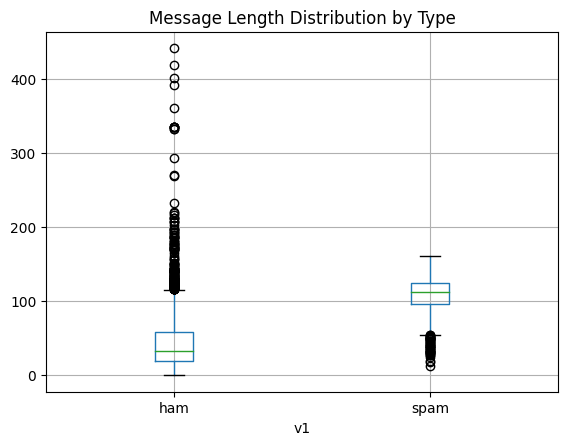

In [12]:
data['message_length'] = data['v2'].apply(len)

print("\nMessage length statistics:")
print(data['message_length'].describe())

plt.figure(figsize=(10, 6))
data.boxplot(column='message_length', by='v1')
plt.title('Message Length Distribution by Type')
plt.suptitle('')
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   v1              5572 non-null   object
 1   v2              5572 non-null   object
 2   message_length  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [14]:
data.isnull().sum()

v1                0
v2                0
message_length    0
dtype: int64


Distribution of spam vs. ham messages:
v1
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


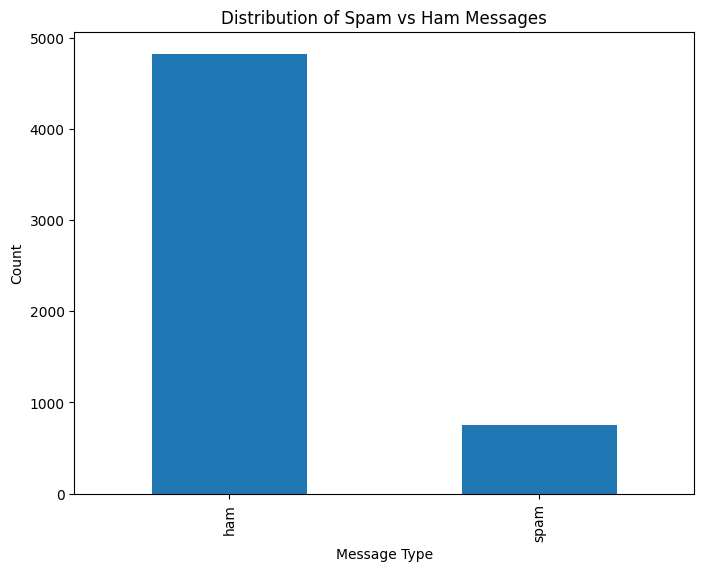

In [15]:
print("\nDistribution of spam vs. ham messages:")
print(data['v1'].value_counts(normalize=True) * 100)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
data['v1'].value_counts().plot(kind='bar')
plt.title('Distribution of Spam vs Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

In [16]:
data.describe()

,message_length
count,5572.000000
mean,52.245513
std,41.555728
min,0.000000
25%,21.000000
50%,38.000000
75%,76.000000
max,442.000000


In [17]:
from collections import Counter
import itertools

def get_top_words(texts, n=10):
    words = list(itertools.chain(*[text.split() for text in texts]))
    return Counter(words).most_common(n)

print("\nTop 10 words in spam messages:")
print(get_top_words(data[data['v1'] == 'spam']['v2']))

print("\nTop 10 words in ham messages:")
print(get_top_words(data[data['v1'] == 'ham']['v2']))


Top 10 words in spam messages:
[('call', 367), ('å', 299), ('free', 224), ('2', 206), ('u', 183), ('txt', 163), ('text', 144), ('ur', 144), ('mobile', 139), ('4', 137)]

Top 10 words in ham messages:
[('u', 1076), ('2', 322), ('gt', 318), ('lt', 316), ('get', 316), ('ok', 287), ('go', 276), ('call', 251), ('know', 245), ('come', 245)]


In [18]:
data['v1']=data['v1'].map({'ham':0,'spam':1})

In [19]:
X = data['v2'].values
y = data['v1']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer(stop_words='english')

In [23]:

cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)


In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [25]:
from sklearn.model_selection import GridSearchCV
# Support Vector machine

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)
best_clf = grid.best_estimator_
print(best_clf.score(X_test, y_test))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.870 total time=   1.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=   1.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.870 total time=   1.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.870 total time=   1.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.870 total time=   1.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.870 total time=   0.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.869 total time=   0.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.870 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.870 total time=   0.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.870 total time=   0.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.870 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Parameters specific to GaussianNB
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

grid = GridSearchCV(GaussianNB(), param_grid, refit=True, verbose=3)

grid.fit(X_train.toarray(), y_train)

print(grid.best_params_)
best_nb = grid.best_estimator_

print(best_clf.score(X_test.toarray(), y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.897 total time=   0.8s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.916 total time=   0.7s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.889 total time=   0.7s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.898 total time=   0.7s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.893 total time=   0.7s
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.897 total time=   0.7s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.916 total time=   0.7s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.889 total time=   0.8s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.898 total time=   0.8s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.893 total time=   0.8s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.897 total time=   0.7s
[CV 2/5] END ...............var_smoothing=1e-07;,

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Remove 'gamma' and 'kernel' from param_grid
param_grid = {'C': [0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)
best_lr = grid.best_estimator_
print(best_clf.score(X_test, y_test))
best_lr.predict(X_test)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.967 total time=   0.1s
[CV 2/5] END .............................C=0.1;, score=0.974 total time=   0.1s
[CV 3/5] END .............................C=0.1;, score=0.964 total time=   0.1s
[CV 4/5] END .............................C=0.1;, score=0.967 total time=   0.1s
[CV 5/5] END .............................C=0.1;, score=0.973 total time=   0.1s
[CV 1/5] END ...............................C=1;, score=0.976 total time=   0.3s
[CV 2/5] END ...............................C=1;, score=0.982 total time=   0.1s
[CV 3/5] END ...............................C=1;, score=0.975 total time=   0.1s
[CV 4/5] END ...............................C=1;, score=0.979 total time=   0.1s
[CV 5/5] END ...............................C=1;, score=0.981 total time=   0.1s
[CV 1/5] END ..............................C=10;, score=0.980 total time=   0.1s
[CV 2/5] END ..............................C=10;,

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
import numpy as np

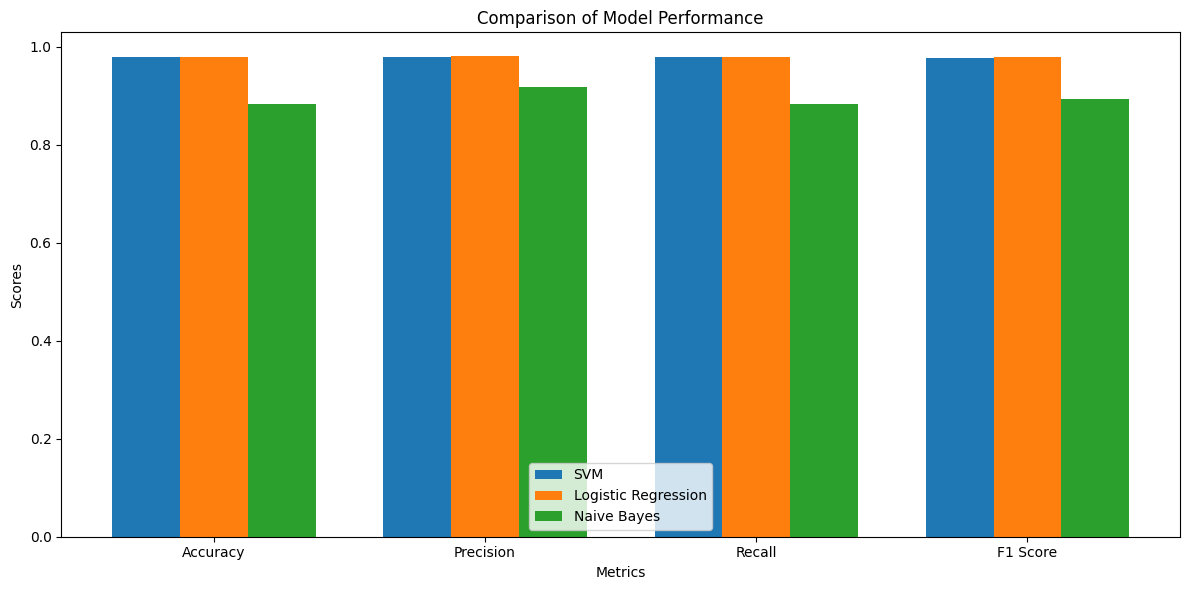

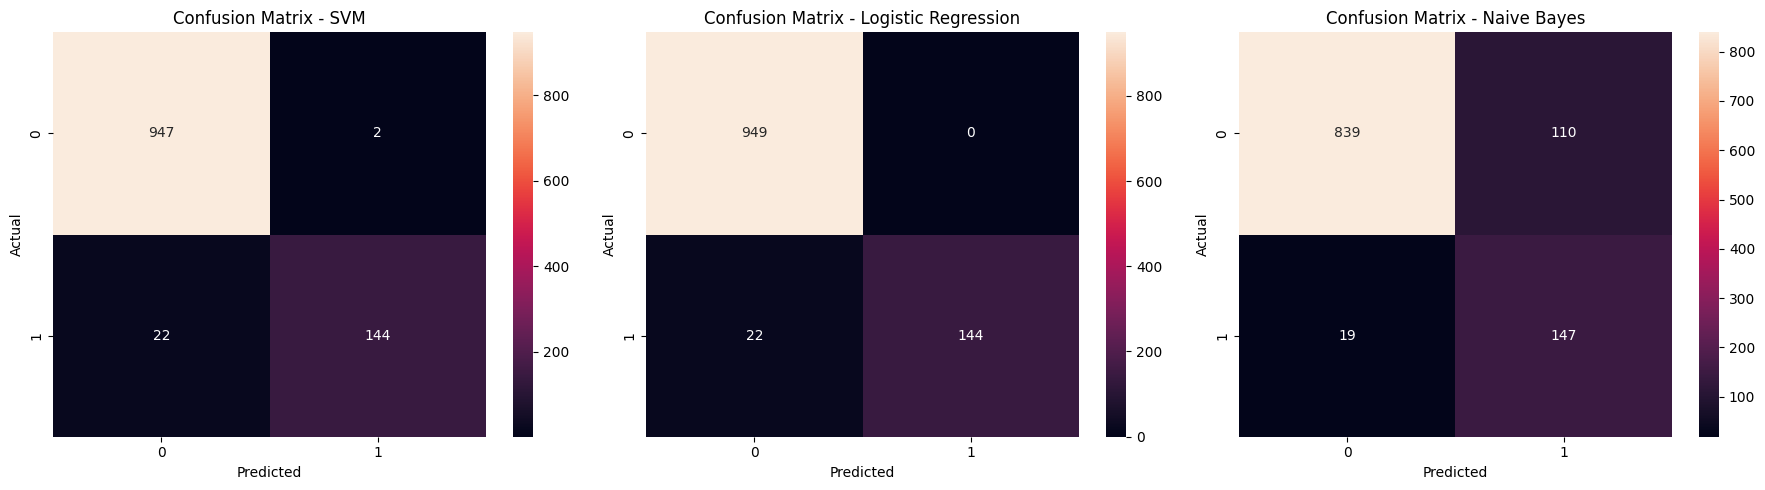

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def plot_metrics(models, X_test, y_test):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    results = {model_name: [] for model_name in models.keys()}

    for model_name, model in models.items():
        y_pred = model.predict(X_test.toarray())
        results[model_name].append(accuracy_score(y_test, y_pred))
        results[model_name].append(precision_score(y_test, y_pred, average='weighted'))
        results[model_name].append(recall_score(y_test, y_pred, average='weighted'))
        results[model_name].append(f1_score(y_test, y_pred, average='weighted'))

    # Bar plot for metrics
    plt.figure(figsize=(12, 6))
    x = np.arange(len(metrics))
    width = 0.25

    for i, (model_name, scores) in enumerate(results.items()):
        plt.bar(x + i*width, scores, width, label=model_name)

    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title('Comparison of Model Performance')
    plt.xticks(x + width, metrics)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Confusion matrices
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for ax, (model_name, model) in zip(axes, models.items()):
        y_pred = model.predict(X_test.toarray())
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', ax=ax)
        ax.set_title(f'Confusion Matrix - {model_name}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
    plt.tight_layout()
    plt.show()


models = {
    'SVM': best_clf,
    'Logistic Regression': best_lr,
    'Naive Bayes': best_nb
}


plot_metrics(models, X_test, y_test)

In [30]:

best_models = {
    'SVM': best_clf,
    'Logistic Regression': best_lr,
    'Naive Bayes': best_nb
}


In [31]:
from sklearn.metrics import accuracy_score


scores = {}


for model_name, model in best_models.items():
    y_pred = model.predict(X_test.toarray())
    scores[model_name] = accuracy_score(y_test, y_pred)

print("\nAll model scores:")
for model_name, score in scores.items():
    print(f"{model_name}: {score:.4f}")


best_model_key = max(scores, key=scores.get)
print(f"The best model is: {best_model_key}")
print(f"Its accuracy score is: {scores[best_model_key]:.4f}")


All model scores:
SVM: 0.9785
Logistic Regression: 0.9803
Naive Bayes: 0.8843
The best model is: Logistic Regression
Its accuracy score is: 0.9803


In [37]:


#
new_data = ["Nah I don't think he goes to usf, he lives around here though"]


preprocessed_new_data = [preprocess_text(text) for text in new_data]


X_new = cv.transform(preprocessed_new_data)

predictions = best_models[best_model_key].predict(X_new)
print(predictions)


if predictions[0] == 0:
    print("The message is classified as: ham")
else:
    print("The message is classified as: spam")

[0]
The message is classified as: ham


In [33]:
import pickle

# Save the trained classifier model
with open('spam_classifier_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)
